In [1]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark.sql.types import DecimalType
import os

# Creating a SparkSession
# spark = SparkSession.builder.appName("MySparkApp").getOrCreate()

spark = SparkSession \
    .builder \
    .appName("MySparkApp") \
    .config("spark.jars", "postgresql-42.7.3.jar") \
    .getOrCreate()

In [2]:
properties = {
    'HOSTNAME' : 'database-3.cfiq0ygikewk.us-east-2.rds.amazonaws.com',
    'PORT' : 5432,
    'DBNAME' : 'postgres',
    'USERNAME' : 'root',
    'PASS' : 'brianna123'
}

df = spark.read \
    .format("jdbc") \
    .option("url", f"jdbc:postgresql://{properties['HOSTNAME']}:{properties['PORT']}/{properties['DBNAME']}") \
    .option("dbtable", "darwin") \
    .option("user", properties['USERNAME']) \
    .option("password", properties['PASS']) \
    .option("driver", "org.postgresql.Driver") \
    .load()

df.printSchema()

root
 |-- route_id: string (nullable = true)
 |-- unique_id: string (nullable = true)
 |-- service_start_date: date (nullable = true)
 |-- update_origin: string (nullable = true)
 |-- train_platform: string (nullable = true)
 |-- working_time_pass: timestamp (nullable = true)
 |-- working_time_arrival: timestamp (nullable = true)
 |-- working_time_departure: timestamp (nullable = true)
 |-- planned_time_arrival: timestamp (nullable = true)
 |-- planned_time_departure: timestamp (nullable = true)
 |-- actual_arrival_time: timestamp (nullable = true)
 |-- actual_departure_time: timestamp (nullable = true)
 |-- platform: string (nullable = true)
 |-- train_length: integer (nullable = true)
 |-- estimated_time: timestamp (nullable = true)
 |-- source: string (nullable = true)
 |-- actual_time: timestamp (nullable = true)
 |-- actual_time_class: string (nullable = true)
 |-- is_delayed_arrival: boolean (nullable = true)
 |-- is_delayed_departure: boolean (nullable = true)
 |-- source_instan

## Read in Data

In [3]:
# read in data
# df = spark.read.parquet('rail_data_cleaned_20230728132300.parquet')
pandas_df = df.toPandas()
pandas_df

,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_pass,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,...,platform,train_length,estimated_time,source,actual_time,actual_time_class,is_delayed_arrival,is_delayed_departure,source_instance,estimated_time_minutes
0,202407087154582,G54582,2024-07-08,TD,CRSHLTN,NaT,1970-01-01 15:48:30,1970-01-01 15:49:30,1970-01-01 15:49:00,1970-01-01 15:49:00,...,1,8.0,NaT,None,NaT,None,False,False,None,NaN
1,202407086735809,C35809,2024-07-08,TD,BRMBRK,NaT,1970-01-01 14:50:00,1970-01-01 14:50:30,1970-01-01 14:50:00,1970-01-01 14:50:00,...,1,NaN,NaT,None,NaT,None,False,False,None,NaN
2,202407086785115,C85115,2024-07-08,TD,SLOUGH,NaT,1970-01-01 14:50:30,1970-01-01 14:51:30,1970-01-01 14:51:00,1970-01-01 14:51:00,...,5,NaN,NaT,None,NaT,None,False,False,None,NaN
3,202407087145471,G45471,2024-07-08,TD,OXFD,NaT,1970-01-01 14:51:30,1970-01-01 14:52:30,1970-01-01 14:52:00,1970-01-01 14:52:00,...,4,NaN,NaT,None,NaT,None,False,False,None,NaN
4,202407087661793,L61793,2024-07-08,TD,BNTFORD,NaT,1970-01-01 14:52:00,1970-01-01 14:53:00,1970-01-01 14:52:00,1970-01-01 14:53:00,...,2,NaN,NaT,None,NaT,None,False,False,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22402,202407098082969,P82969,2024-07-09,CIS,SUMRSTN,NaT,1970-01-01 23:14:30,1970-01-01 23:15:30,1970-01-01 23:15:00,1970-01-01 23:15:00,...,2,NaN,NaT,None,NaT,None,False,False,None,NaN
22403,202407098080352,P80352,2024-07-09,CIS,WHHL,NaT,1970-01-01 23:14:30,1970-01-01 23:15:00,1970-01-01 23:15:00,1970-01-01 23:15:00,...,1,NaN,NaT,None,NaT,None,False,False,None,NaN
22404,202407098094249,P94249,2024-07-09,CIS,PKHMRYC,NaT,1970-01-01 22:15:00,1970-01-01 22:15:30,1970-01-01 22:15:00,1970-01-01 22:15:00,...,2,NaN,NaT,None,NaT,None,False,False,None,NaN
22405,202407098082766,P82766,2024-07-09,CIS,YOKER,NaT,1970-01-01 23:15:00,1970-01-01 23:15:30,1970-01-01 23:15:00,1970-01-01 23:15:00,...,1,NaN,NaT,None,NaT,None,False,False,None,NaN


In [4]:
# print rows with respective datatypes
df.printSchema()

root
 |-- route_id: string (nullable = true)
 |-- unique_id: string (nullable = true)
 |-- service_start_date: date (nullable = true)
 |-- update_origin: string (nullable = true)
 |-- train_platform: string (nullable = true)
 |-- working_time_pass: timestamp (nullable = true)
 |-- working_time_arrival: timestamp (nullable = true)
 |-- working_time_departure: timestamp (nullable = true)
 |-- planned_time_arrival: timestamp (nullable = true)
 |-- planned_time_departure: timestamp (nullable = true)
 |-- actual_arrival_time: timestamp (nullable = true)
 |-- actual_departure_time: timestamp (nullable = true)
 |-- platform: string (nullable = true)
 |-- train_length: integer (nullable = true)
 |-- estimated_time: timestamp (nullable = true)
 |-- source: string (nullable = true)
 |-- actual_time: timestamp (nullable = true)
 |-- actual_time_class: string (nullable = true)
 |-- is_delayed_arrival: boolean (nullable = true)
 |-- is_delayed_departure: boolean (nullable = true)
 |-- source_instan

## Check for Duplicate Values/ Nulls

In [5]:
# find duplicate rows
df.groupBy(df.columns)\
    .count()\
    .where(F.col('count') > 1)\
    .select(F.sum('count'))\
    .show()

+----------+
|sum(count)|
+----------+
|       797|
+----------+



In [6]:
# drop duplicates
df = df.dropDuplicates()

In [7]:
# get a null count for all columns
Dict_Null = {col:df.filter(df[col].isNull()).count() for col in df.columns}
Dict_Null

{'route_id': 0,
 'unique_id': 0,
 'service_start_date': 0,
 'update_origin': 968,
 'train_platform': 0,
 'working_time_pass': 21986,
 'working_time_arrival': 0,
 'working_time_departure': 0,
 'planned_time_arrival': 1466,
 'planned_time_departure': 1481,
 'actual_arrival_time': 4444,
 'actual_departure_time': 1857,
 'platform': 930,
 'train_length': 12699,
 'estimated_time': 21986,
 'source': 21986,
 'actual_time': 21986,
 'actual_time_class': 21986,
 'is_delayed_arrival': 0,
 'is_delayed_departure': 0,
 'source_instance': 21986,
 'estimated_time_minutes': 21986}

In [8]:
# remove cols with too many null values
df.drop('working_time_pass')
df.drop('pass')
df.drop('train_length')

DataFrame[route_id: string, unique_id: string, service_start_date: date, update_origin: string, train_platform: string, working_time_pass: timestamp, working_time_arrival: timestamp, working_time_departure: timestamp, planned_time_arrival: timestamp, planned_time_departure: timestamp, actual_arrival_time: timestamp, actual_departure_time: timestamp, platform: string, estimated_time: timestamp, source: string, actual_time: timestamp, actual_time_class: string, is_delayed_arrival: boolean, is_delayed_departure: boolean, source_instance: string, estimated_time_minutes: int]

In [9]:
# drop rows with null values from the dataset
df = df.dropna(subset='planned_time_departure')
df = df.dropna(subset='update_origin')
df.count()

19541

In [10]:
# pyspark value_counts
# get list of categorical var cols
categorical_columns = [c for c in df.columns if df.select(c).dtypes[0][1] == 'string']

# do a value counts for each categorical var
for col_name in categorical_columns:
    print(f"Unique values in {col_name}:")
    df.groupBy(col_name).count().show()

Unique values in route_id:
+---------------+-----+
|       route_id|count|
+---------------+-----+
|202407087661793|    1|
|202407087657787|   14|
|202407097138619|    6|
|202407096785250|    7|
|202407098098324|   22|
|202407097137183|    1|
|202407086746800|    2|
|202407086785944|    2|
|202407098079996|    1|
|202407088079987|    1|
|202407097642328|    7|
|202407096738868|    1|
|202407098085693|    8|
|202407086785223|    2|
|202407088081506|    2|
|202407097643141|    6|
|202407086738670|    1|
|202407098082883|    1|
|202407086784608|    2|
|202407098081246|    4|
+---------------+-----+
only showing top 20 rows

Unique values in unique_id:
+---------+-----+
|unique_id|count|
+---------+-----+
|   P97113|    5|
|   C47082|    2|
|   C35504|    1|
|   P98384|   22|
|   P95240|   17|
|   L42994|    4|
|   P85967|    2|
|   C17272|    5|
|   C85163|    5|
|   G38753|    7|
|   C76503|    2|
|   L68237|    1|
|   C48347|    5|
|   P96737|    2|
|   G45441|    2|
|   P93148|    2|
|

## Merge Data with Rail References

In [11]:
# import rail references and merge with api data
rail_ref = spark.read.csv('RailReferences.csv', header=True, inferSchema=True)
rail_ref.printSchema()

root
 |-- AtcoCode: string (nullable = true)
 |-- TiplocCode: string (nullable = true)
 |-- CrsCode: string (nullable = true)
 |-- StationName: string (nullable = true)
 |-- StationNameLang: string (nullable = true)
 |-- GridType: string (nullable = true)
 |-- Easting: integer (nullable = true)
 |-- Northing: integer (nullable = true)
 |-- CreationDateTime: timestamp (nullable = true)
 |-- ModificationDateTime: timestamp (nullable = true)
 |-- RevisionNumber: integer (nullable = true)
 |-- Modification: string (nullable = true)



In [12]:
# Merge both dfs for Station Name
merged_df = df.join(rail_ref, df['train_platform'] == rail_ref['TiplocCode'], how='left')
merged_df.count()

19558

## Creating New Cols

In [13]:
# create separate cols for date, time, hour
from pyspark.sql.functions import *
import datetime

#planned arrival
merged_df = merged_df.withColumn('planned_arrival_date', to_date(F.col('planned_time_arrival'), 'YYYY-mm-dd'))
merged_df = merged_df.withColumn('planned_arrival_hour', hour(F.col('planned_time_arrival')))

# planned departure
merged_df = merged_df.withColumn('planned_dep_date', to_date(F.col('planned_time_departure'), 'YYYY-mm-dd'))
merged_df = merged_df.withColumn('planned_dep_hour', hour(F.col('planned_time_departure')))

# actual arrival
merged_df = merged_df.withColumn('actual_arrival_date', to_date(F.col('actual_arrival_time'), 'YYYY-mm-dd'))
merged_df = merged_df.withColumn('actual_arrival_hour', hour(F.col('actual_arrival_time')))

# actual departure
merged_df = merged_df.withColumn('actual_dep_date', to_date(F.col('actual_departure_time'), 'YYYY-mm-dd'))
merged_df = merged_df.withColumn('actual_dep_hour', hour(F.col('actual_departure_time')))

# difference between planned and actual arrival time in minutes
merged_df = merged_df.withColumn('arrival_time_delayed_by', (unix_timestamp("actual_arrival_time") - unix_timestamp('planned_time_arrival'))/60)
merged_df = merged_df.withColumn('dep_time_delayed_by', (unix_timestamp("actual_departure_time") - unix_timestamp('planned_time_departure'))/60)

# create weekday var
merged_df = merged_df.withColumn('day_of_week', date_format(F.col('actual_dep_date'), 'EEEE'))


merged_df.select(F.col('arrival_time_delayed_by')).filter(F.col('arrival_time_delayed_by') > 0).orderBy('arrival_time_delayed_by', ascending=False).show()

+-----------------------+
|arrival_time_delayed_by|
+-----------------------+
|                  125.0|
|                  124.0|
|                  123.0|
|                  117.0|
|                  117.0|
|                  117.0|
|                  117.0|
|                  117.0|
|                  116.0|
|                  116.0|
|                  115.0|
|                  110.0|
|                  110.0|
|                  110.0|
|                  110.0|
|                  110.0|
|                  109.0|
|                  102.0|
|                  102.0|
|                  102.0|
+-----------------------+
only showing top 20 rows



## Describe/ Explore Data

In [14]:
# Suggestions
# Merge the Station Rail Name Reference Table with the API data in order to provide more readable station names.
# How would you determine the top 10 most frequently visited stations in a day?
# What information can be explored to understand train delays?
# Are certain stations busier than others at certain times?

In [15]:
# convert to pandas for additional exploration and visualization
pandas_df = merged_df.toPandas()

## Data Dict
- route_id: The unique identifier for each train route.
- unique_id: The unique identifier for each train
- service_start_date: The date when the train service for the particular route started.
- update_origin: Source or system from which the data was updated or retrieved.
- train_platform: The short name for a station where the train arrives and departs.
- working_time_pass: The planned or scheduled time for the train to pass a certain point or station.
- working_time_arrival: The planned or scheduled time for the train to arrive at a station.
- working_time_departure: The planned or scheduled time for the train to depart from a station.
- planned_time_arrival: The officially planned time for the train to arrive at a station. This could be the public-facing scheduled time.
- planned_time_departure: The officially planned time for the train to depart from a station. This could be the public-facing scheduled time.
- platform: The platform number at the station where the train arrives and departs.
- train_length: The physical length of the train. Number of cars.
- actual_arrival_time: The actual time when the train arrived at a station.
- actual_departure_time: The actual time when the train departed from a station.
- is_delayed_arrival: A boolean flag indicating whether the train arrived late
- is_delayed_departure: A boolean flag indicating whether the train departed late from a station.

In [16]:
# compare planned arrival/ departure with actual
# comapre average delay
# delays by station, count is delayed
# look at timestamps for busiest stations
# look at delays during night vs morning
# col subtracting planned vs actual

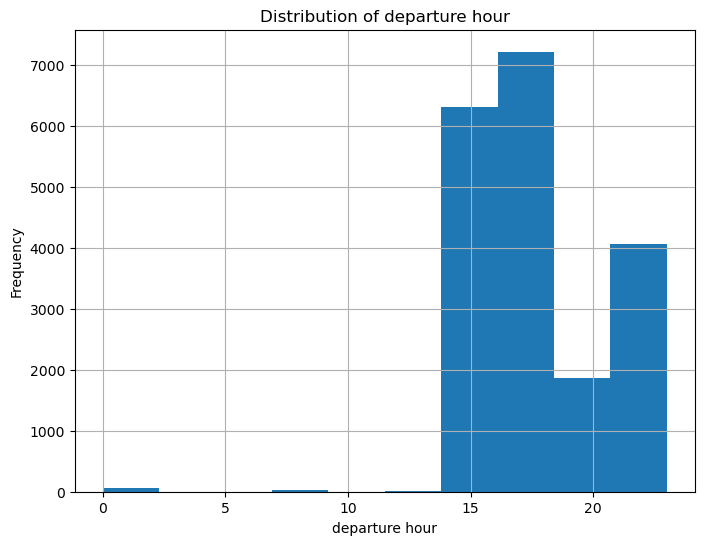

In [17]:
# create distributions 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(pandas_df['planned_dep_hour'])
plt.title('Distribution of departure hour')
plt.xlabel('departure hour')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [18]:
# pie chart to show proportion of delays
# plt.figure(figsize=(8, 6))
# plt.pie(pandas_df['is_delayed_departure'])
# plt.title('Proportion of delays')
# plt.grid()
# plt.show()

In [19]:
merged_df.groupBy('StationName').mean().limit(5).show()

+--------------------+------------------+---------------------------+-----------------+-------------+-------------------+-------------------------+---------------------+------------------------+--------------------+----------------------------+------------------------+
|         StationName| avg(train_length)|avg(estimated_time_minutes)|     avg(Easting)|avg(Northing)|avg(RevisionNumber)|avg(planned_arrival_hour)|avg(planned_dep_hour)|avg(actual_arrival_hour)|avg(actual_dep_hour)|avg(arrival_time_delayed_by)|avg(dep_time_delayed_by)|
+--------------------+------------------+---------------------------+-----------------+-------------+-------------------+-------------------------+---------------------+------------------------+--------------------+----------------------------+------------------------+
|Audley End Rail S...|             6.125|                       NULL|         551600.0|     236300.0|                1.0|                   18.375|               18.375|      18.428571428571

In [20]:
# create new df with route_id, unique_id, StationName, isDelayed
delayed_df = merged_df[['route_id', 'unique_id', 'StationName', 'is_delayed_arrival', 'is_delayed_departure']]
delayed_df.limit(5).show()

+---------------+---------+--------------------+------------------+--------------------+
|       route_id|unique_id|         StationName|is_delayed_arrival|is_delayed_departure|
+---------------+---------+--------------------+------------------+--------------------+
|202407086746668|   C46668|Doncaster Rail St...|             false|               false|
|202407086765055|   C65055|                NULL|              true|                true|
|202407088094162|   P94162|Clapham High Stre...|             false|               false|
|202407088097455|   P97455|Charing (Kent) Ra...|             false|               false|
|202407088090877|   P90877|Homerton Rail Sta...|             false|               false|
+---------------+---------+--------------------+------------------+--------------------+



### Station with most delays

In [21]:
delayed_df.filter(F.col('is_delayed_arrival') == True).groupBy('StationName', 'is_delayed_arrival').count().orderBy('count', ascending=False).show()
delayed_df.filter(F.col('is_delayed_departure') == True).groupBy('StationName', 'is_delayed_departure').count().orderBy('count', ascending=False).show()

+--------------------+------------------+-----+
|         StationName|is_delayed_arrival|count|
+--------------------+------------------+-----+
|                NULL|              true|   85|
|London Bridge Rai...|              true|   30|
|Shipley Rail Station|              true|   30|
|London Waterloo E...|              true|   24|
|Frizinghall Rail ...|              true|   20|
|Keighley Rail Sta...|              true|   16|
|Bingley Rail Station|              true|   16|
|Sunderland Rail S...|              true|   15|
|Ben Rhydding Rail...|              true|   12|
|Guiseley Rail Sta...|              true|   12|
|Menston Rail Station|              true|   12|
|Burley-in-Wharfed...|              true|   12|
|Hither Green Rail...|              true|   11|
|Lewisham Rail Sta...|              true|   11|
|Steeton & Silsden...|              true|   11|
|Crossflatts Rail ...|              true|   10|
|Cononley Rail Sta...|              true|   10|
|Saltaire Rail Sta...|              true

In [22]:
# find station with the greatest time delays

In [23]:
pandas_df['StationName'] = pandas_df['StationName'].fillna(pandas_df['train_platform'])

In [24]:
result =pandas_df.groupby('StationName')['dep_time_delayed_by'].sum().reset_index()
result = result.sort_values(by='dep_time_delayed_by', ascending=False)
result

,StationName,dep_time_delayed_by
1671,Shipley Rail Station,1053.0
1179,London Bridge Rail Station,930.0
1815,Sunderland Rail Station,865.0
748,Frizinghall Rail Station,687.0
1213,MLLF,554.0
...,...,...
577,Doncaster Rail Station,-1238.0
1560,Retford Rail Station,-1394.0
1458,Penychain Rail Station,-1406.0
499,Criccieth Rail Station,-1408.0


## Questions:
- Which train stations have the most delays?
- Which has the longest delays?
- Are delays more frequent at certain times of the day?
- Total frequency of delays
- Correlation between delays and train length?

In [25]:
result = pandas_df[pandas_df['is_delayed_departure'] == True].groupby('StationName')['is_delayed_departure'].count().reset_index()
result = result.sort_values(by='is_delayed_departure', ascending=False)
result

,StationName,is_delayed_departure
360,London Bridge Rail Station,32
498,Shipley Rail Station,30
363,London Waterloo East Rail Station,26
226,Frizinghall Rail Station,20
307,Keighley Rail Station,16
...,...,...
250,Gravesend Rail Station,1
248,Grantham Rail Station,1
247,Grange-over-Sands Rail Station,1
246,Gowerton Rail Station,1


In [26]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19558 entries, 0 to 19557
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   route_id                 19558 non-null  object        
 1   unique_id                19558 non-null  object        
 2   service_start_date       19558 non-null  object        
 3   update_origin            19558 non-null  object        
 4   train_platform           19558 non-null  object        
 5   working_time_pass        0 non-null      datetime64[ns]
 6   working_time_arrival     19558 non-null  datetime64[ns]
 7   working_time_departure   19558 non-null  datetime64[ns]
 8   planned_time_arrival     19537 non-null  datetime64[ns]
 9   planned_time_departure   19558 non-null  datetime64[ns]
 10  actual_arrival_time      15296 non-null  datetime64[ns]
 11  actual_departure_time    17799 non-null  datetime64[ns]
 12  platform                 19247 n

In [27]:
delayed_df = pandas_df[pandas_df['is_delayed_departure'] == True]
delayed_df.head()

,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_pass,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,...,planned_arrival_hour,planned_dep_date,planned_dep_hour,actual_arrival_date,actual_arrival_hour,actual_dep_date,actual_dep_hour,arrival_time_delayed_by,dep_time_delayed_by,day_of_week
1,202407086765055,C65055,2024-07-08,Darwin,PELAWTW,NaT,1970-01-01 14:07:00,1970-01-01 14:07:30,1970-01-01 14:07:00,1970-01-01 14:07:00,...,14.0,1970-01-01,14,1970-01-01,15.0,1970-01-01,15.0,63.0,63.0,Thursday
9,202407088082098,P82098,2024-07-08,TD,KRKH,NaT,1970-01-01 16:51:30,1970-01-01 16:52:00,1970-01-01 16:52:00,1970-01-01 16:52:00,...,16.0,1970-01-01,16,1970-01-01,17.0,1970-01-01,17.0,8.0,8.0,Thursday
10,202407087136551,G36551,2024-07-08,Darwin,HBDNBDG,NaT,1970-01-01 22:37:00,1970-01-01 22:38:00,1970-01-01 22:37:00,1970-01-01 22:38:00,...,22.0,1970-01-01,22,1970-01-01,22.0,1970-01-01,22.0,7.0,7.0,Thursday
31,202407088080672,P80672,2024-07-08,Darwin,SHWLNDS,NaT,1970-01-01 17:33:30,1970-01-01 17:34:00,1970-01-01 17:34:00,1970-01-01 17:34:00,...,17.0,1970-01-01,17,1970-01-01,17.0,1970-01-01,17.0,0.0,0.0,Thursday
45,202407087144904,G44904,2024-07-08,Darwin,NTHCAMP,NaT,1970-01-01 22:40:30,1970-01-01 22:41:30,1970-01-01 22:41:00,1970-01-01 22:41:00,...,22.0,1970-01-01,22,1970-01-01,23.0,1970-01-01,23.0,27.0,28.0,Thursday


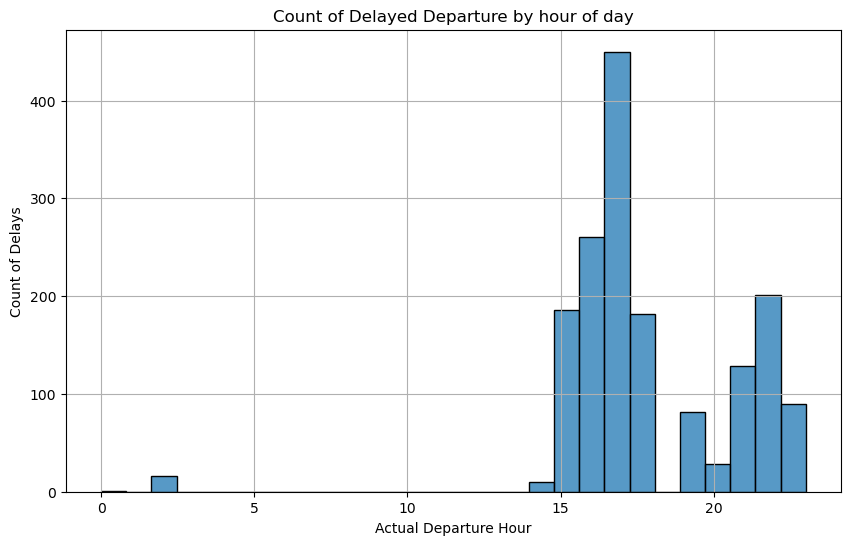

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(data=delayed_df, x='actual_dep_hour')
plt.title('Count of Delayed Departure by hour of day')
plt.xlabel('Actual Departure Hour')
plt.ylabel('Count of Delays')
plt.grid()
plt.show()

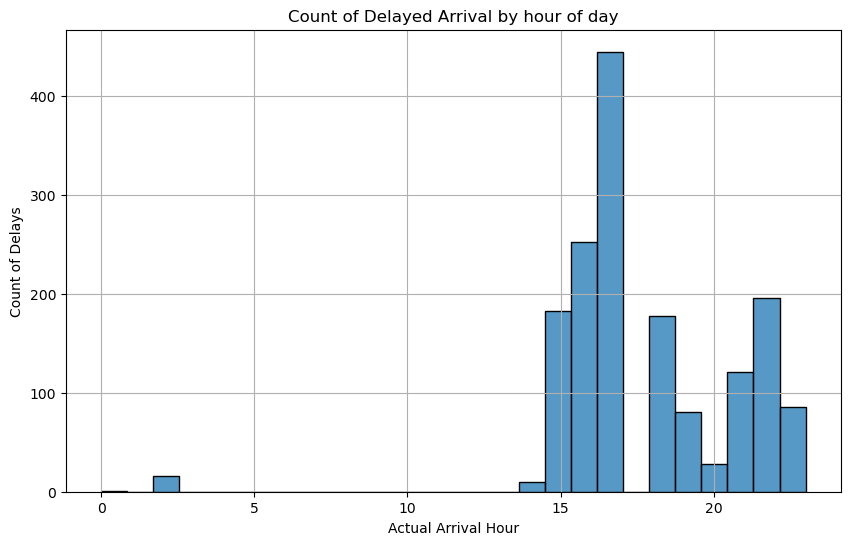

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(data=delayed_df, x='actual_arrival_hour')
plt.title('Count of Delayed Arrival by hour of day')
plt.xlabel('Actual Arrival Hour')
plt.ylabel('Count of Delays')
plt.grid()
plt.show()

In [30]:
pandas_df['is_delayed_departure'].value_counts()

False    17922
True      1636
Name: is_delayed_departure, dtype: int64

In [31]:
pandas_df['is_delayed_arrival'].value_counts()

False    17961
True      1597
Name: is_delayed_arrival, dtype: int64

In [32]:
pandas_df['arrival_time_delayed_by'].value_counts()

0.0     7789
1.0     1245
2.0     1211
3.0      911
4.0      616
        ... 
56.0       1
87.0       1
46.0       1
88.0       1
99.0       1
Name: arrival_time_delayed_by, Length: 106, dtype: int64

In [33]:
delayed_df[['day_of_week', 'planned_dep_date']].value_counts()

day_of_week  planned_dep_date
Thursday     1970-01-01          1636
dtype: int64

In [34]:
weekday_df = delayed_df.groupby('day_of_week').count().reset_index()

,day_of_week,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_pass,working_time_arrival,working_time_departure,planned_time_arrival,...,planned_arrival_date,planned_arrival_hour,planned_dep_date,planned_dep_hour,actual_arrival_date,actual_arrival_hour,actual_dep_date,actual_dep_hour,arrival_time_delayed_by,dep_time_delayed_by
0,Thursday,1636,1636,1636,1636,1636,0,1636,1636,1636,...,1636,1636,1636,1636,1598,1598,1636,1636,1598,1636


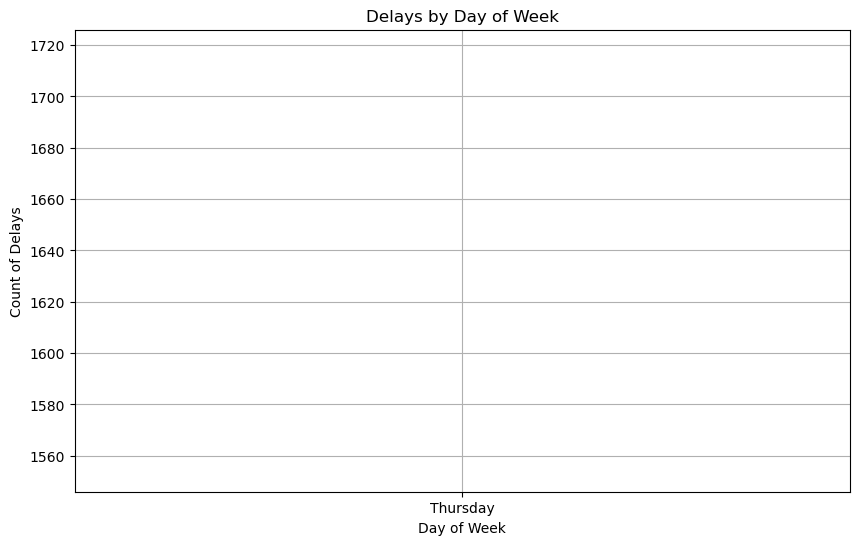

In [35]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10,6))
# sns.lineplot(data=weekday_df, x='day_of_week', y='route_id')
# plt.title('Delays by Day of Week')
# plt.xlabel('Day of Week')
# plt.ylabel('Count of Delays')
# plt.grid()
# plt.show()

## Logistic Regression
predict if train will be delayed

In [36]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
import pandas as pd 

# Assuming `pandas_df` is already defined and contains the necessary columns 
vars = pandas_df[['train_platform', 'planned_arrival_hour', 'planned_dep_hour', 'is_delayed_departure']].dropna() 
vars['is_delayed_departure'] = vars['is_delayed_departure'].astype('float') 
vars['planned_dep_hour'] = vars['planned_dep_hour'].astype('float') 

# One-hot encoding for the categorical 'platform' column 
vars = pd.get_dummies(vars, columns=['train_platform'], dtype='float')

# X = all columns except 'is_delayed_departure' 
X = vars.drop('is_delayed_departure', axis=1) 
y = vars['is_delayed_departure'] 

# Splitting the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

In [37]:
# Training the logistic regression model 
model = LogisticRegression(max_iter=10000) 
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [38]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9210167178437393
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      5382
         1.0       0.76      0.05      0.10       480

    accuracy                           0.92      5862
   macro avg       0.84      0.53      0.53      5862
weighted avg       0.91      0.92      0.89      5862

